In [534]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [535]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/d12a1a3cdb62c5646282ebe51a4a1e1cf93f47a6/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [536]:
#!wget $data

In [537]:
df = pd.read_csv('churn.csv')

In [538]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### A bit of cleaning 

In [539]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [540]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [541]:
string_cols = list(df.dtypes[df.dtypes=='object'].index)

In [542]:
for col in string_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [543]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


In [544]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu,9305-cdskc,1452-kiovk,6713-okomc,7892-pookp,6388-tabgu,...,9767-fflem,0639-tsiqw,8456-qdavc,7750-eyxwz,2569-wgero,6840-resvb,2234-xaduh,4801-jzazl,8361-ltmkd,3186-ajiek
gender,female,male,male,male,female,female,male,female,female,male,...,male,female,male,female,female,male,female,female,male,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
partner,yes,no,no,no,no,no,no,no,yes,no,...,no,no,no,no,no,yes,yes,yes,yes,no
dependents,no,no,no,no,no,no,yes,no,no,yes,...,no,no,no,no,no,yes,yes,yes,no,no
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
phoneservice,no,yes,yes,no,yes,yes,yes,no,yes,yes,...,yes,yes,yes,no,yes,yes,yes,no,yes,yes
multiplelines,no_phone_service,no,no,no_phone_service,no,yes,yes,no_phone_service,yes,no,...,no,yes,no,no_phone_service,no,yes,yes,no_phone_service,yes,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic,fiber_optic,fiber_optic,dsl,fiber_optic,dsl,...,fiber_optic,fiber_optic,fiber_optic,dsl,no,dsl,fiber_optic,dsl,fiber_optic,fiber_optic
onlinesecurity,no,yes,yes,yes,no,no,no,yes,no,yes,...,no,yes,no,no,no_internet_service,yes,no,yes,no,yes


In [545]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [546]:
# df.totalcharges=  df.totalcharges.str.replace('_', '0')

In [547]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [548]:
df.totalcharges.isnull().sum()

11

In [549]:
df.totalcharges =  df.totalcharges.fillna(0)

In [550]:
df.totalcharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: totalcharges, dtype: float64

In [551]:
df.churn = (df.churn == 'yes').astype(int)

In [552]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

### Setting up the framework 

In [553]:
from sklearn.model_selection import train_test_split

In [554]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [555]:
len(df_test), len(df_train_full)

(1409, 5634)

In [556]:
df_train , df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

# x% of 80 is equal to 20 % of 100 % therefore x = 25

In [557]:
len(df_train), len(df_val)

(4225, 1409)

In [558]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [559]:
del df_train['churn']
del df_val['churn']

### EDA

In [560]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [561]:
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [562]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [563]:
categorical_cols = string_cols + ['seniorcitizen']

categorical_cols.remove('totalcharges')
categorical_cols.remove('churn')
categorical_cols.remove('customerid')

categorical_cols

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'seniorcitizen']

In [564]:
numerical_cols = ['tenure', 'monthlycharges', 'totalcharges']

In [565]:
df_train_full[categorical_cols].nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
seniorcitizen       2
dtype: int64

### Feature importance

In [566]:
# global_mean = df.churn.sum()/len(df.churn)
global_mean = df_train_full.churn.mean().round(3)

In [567]:
global_mean 

0.27

In [568]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender==female' , round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender==male' , round(male_mean, 3))

gender==female 0.277
gender==male 0.263


In [569]:
female_mean/global_mean

1.0252742012398663

In [570]:
male_mean/global_mean

0.9748649283533003

In [571]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [572]:
partner_yes / global_mean

0.7593826246675986

In [573]:
partner_no / global_mean

1.22151482997322

In [574]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['ratio'] = df_group['mean'] /global_mean
df_group

,mean,diff,ratio
gender,,,
female,0.276824,0.006824,1.025274
male,0.263214,-0.006786,0.974865


In [575]:
from IPython.display import display

In [576]:
for col in categorical_cols: 
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['ratio'] = df_group['mean'] /global_mean
    display(df_group)
    print()

,mean,diff,ratio
gender,,,
female,0.276824,0.006824,1.025274
male,0.263214,-0.006786,0.974865


,mean,diff,ratio
partner,,,
no,0.329809,0.059809,1.221515
yes,0.205033,-0.064967,0.759383


,mean,diff,ratio
dependents,,,
no,0.313760,0.043760,1.162074
yes,0.165666,-0.104334,0.613579


,mean,diff,ratio
phoneservice,,,
no,0.241316,-0.028684,0.893764
yes,0.273049,0.003049,1.011292


,mean,diff,ratio
multiplelines,,,
no,0.257407,-0.012593,0.953361
no_phone_service,0.241316,-0.028684,0.893764
yes,0.290742,0.020742,1.076820


,mean,diff,ratio
internetservice,,,
dsl,0.192347,-0.077653,0.712398
fiber_optic,0.425171,0.155171,1.574709
no,0.077805,-0.192195,0.288167


,mean,diff,ratio
onlinesecurity,,,
no,0.420921,0.150921,1.558967
no_internet_service,0.077805,-0.192195,0.288167
yes,0.153226,-0.116774,0.567503


,mean,diff,ratio
onlinebackup,,,
no,0.404323,0.134323,1.497494
no_internet_service,0.077805,-0.192195,0.288167
yes,0.217232,-0.052768,0.804564


,mean,diff,ratio
deviceprotection,,,
no,0.395875,0.125875,1.466205
no_internet_service,0.077805,-0.192195,0.288167
yes,0.230412,-0.039588,0.853379


,mean,diff,ratio
techsupport,,,
no,0.418914,0.148914,1.551534
no_internet_service,0.077805,-0.192195,0.288167
yes,0.159926,-0.110074,0.592320


,mean,diff,ratio
streamingtv,,,
no,0.342832,0.072832,1.269747
no_internet_service,0.077805,-0.192195,0.288167
yes,0.302723,0.032723,1.121195


,mean,diff,ratio
streamingmovies,,,
no,0.338906,0.068906,1.255209
no_internet_service,0.077805,-0.192195,0.288167
yes,0.307273,0.037273,1.138047


,mean,diff,ratio
contract,,,
month-to-month,0.431701,0.161701,1.598893
one_year,0.120573,-0.149427,0.446568
two_year,0.028274,-0.241726,0.104718


,mean,diff,ratio
paperlessbilling,,,
no,0.172071,-0.097929,0.637300
yes,0.338151,0.068151,1.252412


,mean,diff,ratio
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101829,0.622854
credit_card_(automatic),0.164339,-0.105661,0.608661
electronic_check,0.455890,0.185890,1.688482
mailed_check,0.193870,-0.076130,0.718036


,mean,diff,ratio
seniorcitizen,,,
0,0.242270,-0.027730,0.897297
1,0.413377,0.143377,1.531027


## Feature Importance : Mutual information, (cateogrical) 

In [577]:
from sklearn.metrics import mutual_info_score

In [578]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi  = df_train_full[categorical_cols].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False)

df_mi

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature Importance : Correlation, (numerical) 

In [579]:
df_train_full[numerical_cols].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

## One-hot encoding

In [580]:
from sklearn.feature_extraction import DictVectorizer

In [581]:
dv = DictVectorizer(sparse=False)

In [582]:
dicts = df_train[categorical_cols + numerical_cols].to_dict(orient="records")

In [583]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [584]:
X_train = dv.transform(dicts)

In [585]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [586]:
val_dicts = df_val[categorical_cols+ numerical_cols].to_dict(orient="records")

In [587]:
X_val = dv.transform(val_dicts)

In [588]:
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

## Logistic regression 

In [589]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [590]:
z = np.linspace(-7,7,100)
z

array([-7.        , -6.85858586, -6.71717172, -6.57575758, -6.43434343,
       -6.29292929, -6.15151515, -6.01010101, -5.86868687, -5.72727273,
       -5.58585859, -5.44444444, -5.3030303 , -5.16161616, -5.02020202,
       -4.87878788, -4.73737374, -4.5959596 , -4.45454545, -4.31313131,
       -4.17171717, -4.03030303, -3.88888889, -3.74747475, -3.60606061,
       -3.46464646, -3.32323232, -3.18181818, -3.04040404, -2.8989899 ,
       -2.75757576, -2.61616162, -2.47474747, -2.33333333, -2.19191919,
       -2.05050505, -1.90909091, -1.76767677, -1.62626263, -1.48484848,
       -1.34343434, -1.2020202 , -1.06060606, -0.91919192, -0.77777778,
       -0.63636364, -0.49494949, -0.35353535, -0.21212121, -0.07070707,
        0.07070707,  0.21212121,  0.35353535,  0.49494949,  0.63636364,
        0.77777778,  0.91919192,  1.06060606,  1.2020202 ,  1.34343434,
        1.48484848,  1.62626263,  1.76767677,  1.90909091,  2.05050505,
        2.19191919,  2.33333333,  2.47474747,  2.61616162,  2.75

In [591]:
import matplotlib.pyplot as plt


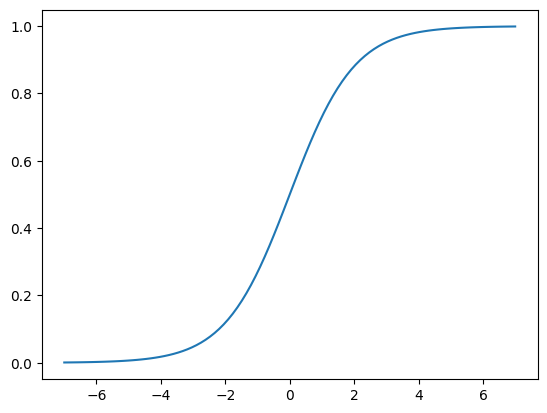

In [592]:
plt.plot(z, sigmoid(z))

### Using the library 

In [593]:
from sklearn.linear_model import LogisticRegression

In [594]:
model = LogisticRegression()

In [595]:
model.fit(X_train, y_train)

LogisticRegression()

In [596]:
model.intercept_[0]

-0.10903521054753158

In [597]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [598]:
y_pred = model.predict_proba(X_val)

In [599]:
churn_decision =  y_pred[:,1] >= 0.5

In [600]:
df_val[churn_decision].customerid # target them with promotional emails

2504    8433-wxgna
4597    3440-jpscl
2343    2637-fkfsy
5591    7228-omtpn
4482    6711-fldfb
           ...    
2611    5976-jcjrh
4211    2034-cgrhz
3999    5276-kqwhg
6240    6521-yytyi
5282    3049-solay
Name: customerid, Length: 311, dtype: object

In [601]:
(churn_decision == y_val).mean() #This is the accuracy of the model

0.8034066713981547

## Model Interpetation

In [602]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

## Using the model

In [603]:
dicts_full_train = df_train_full[categorical_cols+ numerical_cols].to_dict(orient='records')

In [604]:
dv = DictVectorizer(sparse=False)

In [605]:
X_full_train = dv.fit_transform(dicts_full_train)

In [606]:
y_full_train = df_train_full.churn.values

In [607]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [608]:
dicts_test = df_test[categorical_cols + numerical_cols].to_dict(orient='records')

In [609]:
X_test = dv.fit_transform(dicts_test)

In [610]:
y_test = df_test.churn,

In [611]:
y_prob = model.predict_proba(X_test)[:, 1]

In [612]:
y_pred = (y_prob >= 0.5 )

In [613]:
(y_pred == y_test).mean() #this many results are good

0.815471965933286

## Using the model 

In [614]:
customer = df_test.iloc[10].to_dict()
del customer['churn']
customer

{'customerid': '0111-klbqg',
 'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'tenure': 32,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [615]:
X_customer = dv.transform(customer)

In [616]:
X_customer

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [617]:
model.predict(X_customer)[0] #so it says this guy won't churn, which is true

0

In [618]:
df_test.iloc[10].churn

0

In [619]:
model.predict_proba(X_customer)[:,1]

array([0.4056811])

# Evaluation Matrix 

### 01- Accuracy 

In [620]:
len(y_val)

1409

In [621]:
(y_val == churn_decision ).sum()

1132

In [622]:
1132/1409

0.8034066713981547

In [623]:
# or this is same as 
(y_val == churn_decision ).mean()

0.8034066713981547

In [631]:
val_dict = df_val[categorical_cols + numerical_cols].to_dict(orient="records")
X_val = dv.fit_transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

In [632]:
y_pred

array([0.01054309, 0.16661655, 0.19319111, ..., 0.1357759 , 0.8126511 ,
       0.83522369])

In [670]:
from sklearn.metrics import accuracy_score

In [671]:
## But how can be sure that 0.5 is good metric for classification, so lets test
thresholds = np.linspace(0, 1, 1000)

scores = {}
for t in thresholds:
    # churn_decision = (y_pred >=t) 
    # score = (y_val == churn_decision).mean()
    score = accuracy_score(y_val, y_pred>=t)
    scores[t.round(3)] = score.round(5)

In [672]:
sorted(scores.items(), reverse=True, key= lambda x:x[1])[:5]

[(0.552, 0.81547),
 (0.556, 0.81547),
 (0.56, 0.81547),
 (0.561, 0.81547),
 (0.567, 0.81547)]

In [674]:
scores_list = [value for key, value in scores.items() ]

In [675]:
len(scores_list) , len(thresholds)

(1000, 1000)

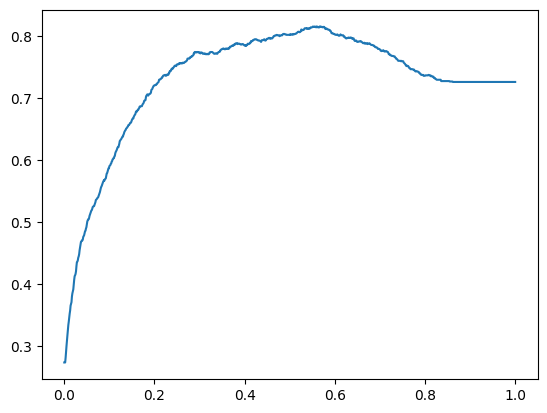

In [676]:
plt.plot(thresholds, scores_list)

### 02-Confusion Matrix

In [681]:
actual_positive = y_val == 1 
actual_negative = y_val ==0

In [693]:
t = 0.5
predicted_positive = y_pred >= t
predicted_negative = y_pred <= t 

In [691]:
tp = (actual_positive & predicted_positive).sum()
tn = (actual_negative & predicted_negative).sum()

In [692]:
tp,tn

(210, 920)

In [694]:
fp = (actual_negative & predicted_positive).sum()
fn = (predicted_negative & actual_positive).sum()

In [695]:
fp, fn

(103, 176)

In [697]:
confusion_matrix = np.array([[tp, fp],[fn, tn]])

In [698]:
confusion_matrix

array([[210, 103],
       [176, 920]])

#### Formulas using matrix 

In [700]:
accuracy = (tp + tn) / (tp +fp + tn + fn)

In [701]:
precision = tp / (tp + fp)

In [702]:
recall = tp / (tp + fn) 

In [703]:
accuracy , precision, recall

(0.8019872249822569, 0.670926517571885, 0.5440414507772021)

In [704]:
fpr = fp / (fp + tn )

In [706]:
tpr = tp / (tp + fn)

In [707]:
fpr, tpr

(0.10068426197458455, 0.5440414507772021)

In [728]:
thresholds = np.linspace(0,1,101)

scores = []
for t in thresholds:
    actual_positive = y_val == 1 
    actual_negative = y_val ==0
    
    predicted_positive = y_pred >= t
    predicted_negative = y_pred <= t 
    
    tp = (actual_positive & predicted_positive).sum()
    tn = (actual_negative & predicted_negative).sum()
    
    fp = (actual_negative & predicted_positive).sum()
    fn = (predicted_negative & actual_positive).sum()
    
    scores.append([t, tp, fp, fn, tn])
    

In [729]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [730]:
df_scores[::10].round(3)

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,365,556,21,467
20,0.2,330,338,56,685
30,0.3,293,226,93,797
40,0.4,249,166,137,857
50,0.5,210,103,176,920
60,0.6,158,50,228,973
70,0.7,93,20,293,1003
80,0.8,17,2,369,1021
90,0.9,0,0,386,1023


In [731]:
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn )
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [732]:
df_scores

,threshold,tp,fp,fn,tn,fpr,tpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,386,930,0,93,0.909091,1.000000
2,0.02,384,855,2,168,0.835777,0.994819
3,0.03,383,788,3,235,0.770283,0.992228
4,0.04,381,741,5,282,0.724340,0.987047
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


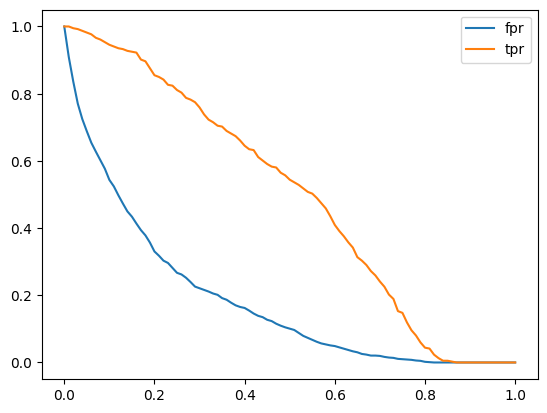

In [754]:
plt.plot(df_scores.threshold, df_scores.fpr, label = 'fpr')
plt.plot(df_scores.threshold, df_scores.tpr, label = 'tpr')

plt.legend()

#### Random model 

In [738]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, size= len(y_pred))

In [741]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [745]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    for t in thresholds:
        actual_positive = y_val == 1 
        actual_negative = y_val ==0

        predicted_positive = y_pred >= t
        predicted_negative = y_pred <= t 

        tp = (actual_positive & predicted_positive).sum()
        tn = (actual_negative & predicted_negative).sum()

        fp = (actual_negative & predicted_positive).sum()
        fn = (predicted_negative & actual_positive).sum()

        scores.append([t, tp, fp, fn, tn])

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn )
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
        
    return df_scores
        

In [748]:
df = tpr_fpr_dataframe(y_val, y_rand )

In [749]:
df

,threshold,tp,fp,fn,tn,fpr,tpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,382,1013,4,10,0.990225,0.989637
2,0.02,379,993,7,30,0.970674,0.981865
3,0.03,375,979,11,44,0.956989,0.971503
4,0.04,372,969,14,54,0.947214,0.963731
...,...,...,...,...,...,...,...
96,0.96,14,41,372,982,0.040078,0.036269
97,0.97,11,36,375,987,0.035191,0.028497
98,0.98,8,19,378,1004,0.018573,0.020725
99,0.99,6,7,380,1016,0.006843,0.015544


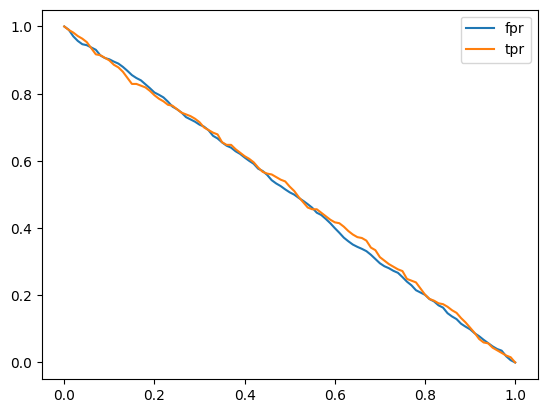

In [753]:
plt.plot(df.threshold, df.fpr, label = 'fpr')
plt.plot(df.threshold, df.tpr, label = 'tpr')

plt.legend()

### Ideal Model 
The idea is to organize the y_pred in such a way that at threshold value one side is no churn and other is churn

In [756]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

num_neg, num_pos

(1023, 386)

In [757]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [758]:
1 - y_val.mean()

0.7260468417317246

In [762]:
y_ideal_pred = np.linspace(0,1,len(y_val)).round(3)
((y_ideal_pred >= .72604 ) == y_ideal).mean()

1.0

In [764]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

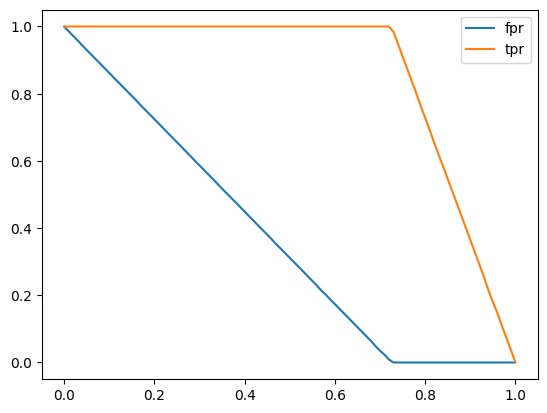

In [767]:
plt.plot(df_ideal.threshold, df_ideal.fpr, label = 'fpr')
plt.plot(df_ideal.threshold, df_ideal.tpr, label = 'tpr')
plt.legend()

### Putting everything together

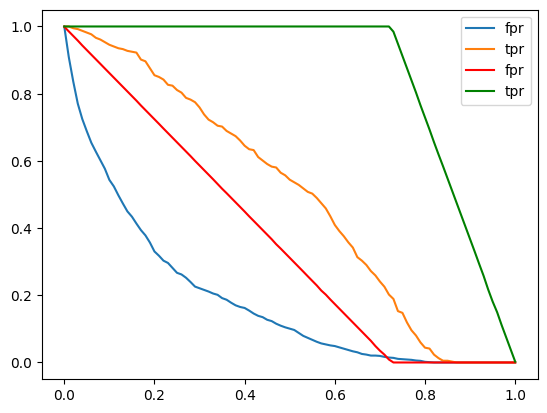

In [772]:
plt.plot(df_scores.threshold, df_scores.fpr, label = 'fpr')
plt.plot(df_scores.threshold, df_scores.tpr, label = 'tpr')

# plt.plot(df.threshold, df.fpr, label = 'fpr')
# plt.plot(df.threshold, df.tpr, label = 'tpr')

plt.plot(df_ideal.threshold, df_ideal.fpr, label = 'fpr', color='red')
plt.plot(df_ideal.threshold, df_ideal.tpr, label = 'tpr', color='green')

plt.legend()

### ROC Curve

Text(0, 0.5, 'TPR')

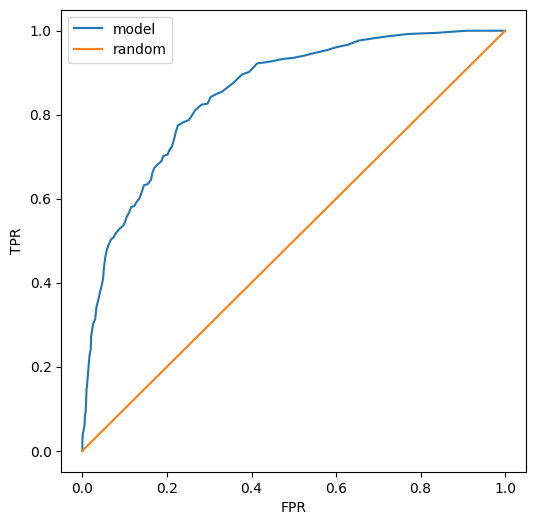

In [780]:
plt.figure(figsize=(6,6))

plt.plot(df_scores.fpr, df_scores.tpr, label = 'model')
# plt.plot(df.fpr, df.tpr, label = 'random')
plt.plot([0,1], [0,1], label= 'random')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')

### Using the sckit learn 

In [781]:
from sklearn.metrics import roc_curve

In [782]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

Text(0, 0.5, 'TPR')

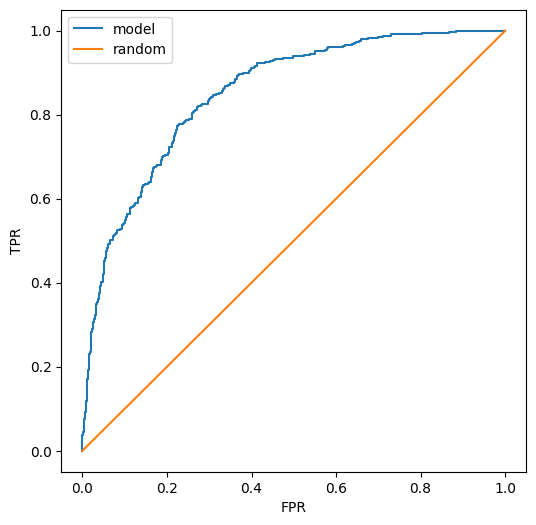

In [784]:
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr, label = 'model')
# plt.plot(df.fpr, df.tpr, label = 'random')
plt.plot([0,1], [0,1], label= 'random')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')

### ROC AUC

In [785]:
from sklearn.metrics import auc

In [786]:
auc(fpr, tpr)

0.8510831193431895

In [787]:
auc(df_scores.fpr, df_scores.tpr)

0.8505943607899149

In [788]:
## Shortcut to quickly get ROC AUC, without calculating tpr, fpr
from sklearn.metrics import roc_auc_score


In [789]:
roc_auc_score(y_val, y_pred)

0.8510831193431895

In [790]:
## So ROC Auc gives probality of selecting postive example over negative example, so let's
## implement it 

In [791]:
pos = y_pred[y_val == 1]
neg = y_pred[y_val == 0]

In [792]:
import random

In [794]:
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) -1)
    neg_ind = random.randint(0, len(neg) -1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success += 1

success/n

0.85278

In [796]:
# Now doing same with numpy 
n = 100000

pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(pos), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.85963

## Cross-Validation

In [819]:
def train(df_train, y_train ,C=1.0):
    dicts = df_train[categorical_cols + numerical_cols].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model 

In [820]:
dv, model = train(df_train, y_train)

In [821]:
def predict(df, dv, model):
    dicts = df[categorical_cols + numerical_cols].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [800]:
predict(df_val, dv, model)

array([0.00899722, 0.20451861, 0.2122173 , ..., 0.13639118, 0.79976555,
       0.83740295])

In [802]:
# now let's do kfold validation 
from sklearn.model_selection import KFold

In [806]:
kfold = KFold(n_splits = 10 , shuffle=True, random_state=1)
kfold.split(df_train_full)

<generator object _BaseKFold.split at 0x29b4ad120>

In [807]:
train_idx , val_idx = next(kfold.split(df_train_full))

In [809]:
len(train_idx), len(val_idx)

(5070, 564)

In [810]:
df_train_full.iloc[val_idx]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
6672,2346-czyil,male,0,no,no,27,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,credit_card_(automatic),20.35,531.60,0
6203,1090-pykci,female,0,yes,yes,69,yes,yes,fiber_optic,yes,...,yes,yes,yes,no,one_year,yes,credit_card_(automatic),105.10,7234.80,0
1374,8999-ypybv,male,0,yes,yes,45,yes,no,dsl,yes,...,yes,yes,yes,yes,two_year,yes,mailed_check,84.35,3858.05,0
4902,5092-stpkp,female,0,no,no,24,yes,no,dsl,yes,...,no,yes,no,no,month-to-month,no,credit_card_(automatic),56.35,1381.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,7337-cinud,female,0,yes,yes,8,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,bank_transfer_(automatic),19.50,159.35,0
562,3701-sfmuh,male,0,yes,yes,7,yes,no,dsl,yes,...,no,no,yes,yes,month-to-month,no,credit_card_(automatic),69.70,516.15,0
2962,3237-ajgeh,female,0,yes,yes,3,no,no_phone_service,dsl,no,...,no,yes,no,no,month-to-month,yes,mailed_check,31.00,95.05,1
5056,3262-eidhv,female,0,yes,yes,72,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,no,credit_card_(automatic),84.70,5893.90,0


In [812]:
# !poetry add tqdm

In [813]:
from tqdm.auto import tqdm

In [825]:
n_splits = 10 

for C in tqdm([0.00001, 0.0001, 0.001, 0.01, .05, 1, 2, 5, 10], total =9):
    kfold = KFold(n_splits = n_splits , shuffle=True, random_state=1)
    auc_scores = []
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train,C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)

        auc_scores.append(auc)
        
    print('C=%s %.3f +- %.3f' % (C, np.mean(auc_scores) , np.std(auc_scores)))

  0%|          | 0/9 [00:00<?, ?it/s]

C=1e-05 0.804 +- 0.013
C=0.0001 0.811 +- 0.012
C=0.001 0.826 +- 0.012
C=0.01 0.840 +- 0.012
C=0.05 0.841 +- 0.011
C=1 0.840 +- 0.012
C=2 0.841 +- 0.012
C=5 0.841 +- 0.012
C=10 0.841 +- 0.012


In [816]:
auc_scores

[0.8479398247539081,
 0.8410581683168317,
 0.8557214756739697,
 0.8333552794008724,
 0.8262717121588089,
 0.8342657342657342,
 0.8412569195701727,
 0.8186669829222013,
 0.8452349192233585,
 0.8621054754462034]

In [827]:
dv, model = train(df_train_full, df_train_full.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

y_test = df_test.churn.values
auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259